<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li><li><span><a href="#who" data-toc-modified-id="who-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>who</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.tools.database import *
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [3]:
pfs = []
for who_id, who in enumerate(tqdm(get_all_drummers())):
    print(who)
    pf = get_profile(who)
    pf['who'] = who_id
    pfs.append(pf)

100%|██████████| 12/12 [00:00<00:00, 91.75it/s]

aaaaa
carolyn
cuxi
fatfat
eve
oliver
chris
sheep
howeverover
celiven
john
kdchang


In [4]:
pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_VI,L_G_VI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,3.9275,14.9631,0.2284,3.8673,0.6172,3.3195,14.2499,2.2618,0.0040,30.3524,...,92.6209,15.9058,-0.4480,0.8114,-0.6615,0.9898,0.6426,0.6989,1,0
1,4.0190,18.1377,0.0705,3.9631,0.6210,4.2206,17.3308,1.9969,0.0169,21.8443,...,62.9151,55.2246,-0.9474,0.9037,-0.9220,0.9141,0.6986,0.5876,1,0
2,4.0236,13.0400,0.0797,3.9863,0.4837,4.9670,11.2247,-0.6386,0.0224,27.8211,...,81.6192,176.5076,-0.8588,-0.0805,0.1700,0.3495,-0.0101,0.9290,1,0
3,3.8817,11.5477,0.1054,3.8125,0.6401,5.3345,9.4844,-1.5474,0.0480,10.8400,...,255.4595,293.2647,0.1073,0.8114,-0.3292,0.9283,-0.3907,-0.1303,1,0
4,3.9184,17.8125,-0.0924,3.8385,0.6610,8.2228,15.0954,0.7883,0.1613,33.4376,...,601.0376,339.2394,-0.0088,0.5145,-0.3856,0.9546,-0.5920,-0.4688,1,0
5,4.1393,17.0307,-0.1970,4.1014,0.2799,9.4942,6.5689,2.3622,0.1570,38.2150,...,640.8692,301.6815,0.0430,0.1501,0.0555,0.9274,-0.6073,-0.4211,1,0
6,3.9818,18.5457,-0.1735,3.9525,0.0470,9.7296,8.3537,2.1609,0.2092,88.5457,...,434.2682,309.3872,0.7447,0.5711,0.1300,0.7668,-0.8121,-0.3206,1,0
7,4.0699,18.6362,-0.2528,4.0221,-0.1310,7.7808,12.4086,5.2966,0.2858,91.1217,...,321.4752,333.1451,0.7817,0.4584,0.0606,0.4203,-0.5448,0.4920,1,0
8,3.9466,15.9268,-0.1329,3.8979,-0.1194,1.8603,11.0576,6.1554,0.3315,35.4394,...,420.8832,351.6388,0.4283,0.5776,0.2290,0.8782,-0.0981,0.3126,1,0
9,3.8751,18.4633,-0.0771,3.8387,-0.0603,0.5273,12.7156,8.8432,0.2303,17.6485,...,420.8832,327.1698,0.3827,0.5499,0.2712,0.8733,-0.3636,-0.0137,1,0


# LGBM training

## utility

In [5]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [6]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [8]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

5139    1
6414    1
1659    2
5448    4
4691    3
3577    2
1346    3
6766    3
3331    0
3999    5
2721    0
5814    2
4718    3
1735    2
6840    4
3272    4
4732    3
607     1
4335    2
6466    1
6387    1
3104    2
4954    0
4395    2
5896    2
5847    2
5878    2
1088    5
3793    3
954     4
       ..
109     3
4539    2
2224    1
3341    5
334     2
589     1
2140    5
5636    1
804     2
1978    4
125     4
151     0
4745    3
143     4
126     4
4531    2
2264    1
158     0
4824    4
1020    0
3871    0
27      1
2010    0
1885    3
2746    0
5048    1
3033    2
2616    4
5001    5
4264    1
Name: hit_type, Length: 2800, dtype: int64

In [9]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 6,
#     'min_data_in_leaf': 3,
    'max_depth': 6,
    'num_leaves': 2 ** 6,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.852063
[10]	valid_0's f1-score: 0.875628
[15]	valid_0's f1-score: 0.889236
[20]	valid_0's f1-score: 0.897019
[25]	valid_0's f1-score: 0.905559
[30]	valid_0's f1-score: 0.913799
[35]	valid_0's f1-score: 0.918154
[40]	valid_0's f1-score: 0.92206
[45]	valid_0's f1-score: 0.92597
[50]	valid_0's f1-score: 0.932182
[55]	valid_0's f1-score: 0.934625
[60]	valid_0's f1-score: 0.936461
[65]	valid_0's f1-score: 0.938043
[70]	valid_0's f1-score: 0.940207
[75]	valid_0's f1-score: 0.938658
[80]	valid_0's f1-score: 0.939839
[85]	valid_0's f1-score: 0.941731
[90]	valid_0's f1-score: 0.942248
[95]	valid_0's f1-score: 0.943056
[100]	valid_0's f1-score: 0.944588
[105]	valid_0's f1-score: 0.944462
[110]	valid_0's f1-score: 0.944864
[115]	valid_0's f1-score: 0.944198
[120]	valid_0's f1-score: 0.947429
[125]	valid_0's f1-score: 0.947948
[130]	valid_0's f1-score: 0.947932
[135]	valid_0's f1-score: 0.947071
[140]	valid_0'

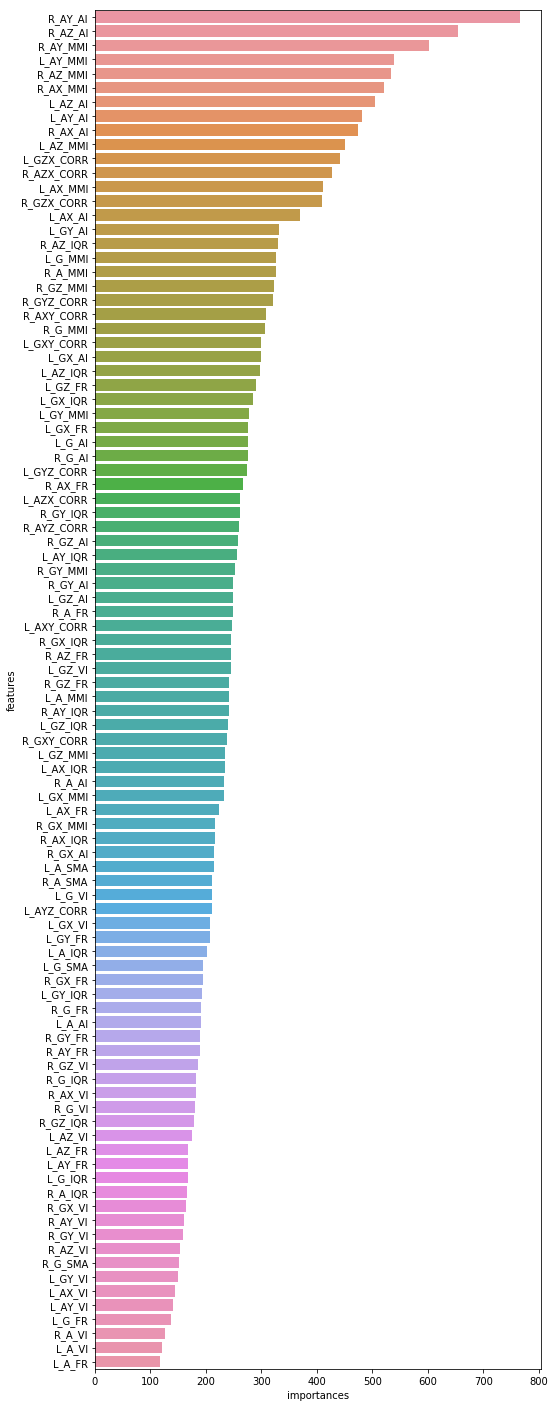

In [10]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [11]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.97345133 0.00884956 0.00884956 0.         0.00884956 0.        ]
 [0.         0.97050938 0.02144772 0.00536193 0.         0.00268097]
 [0.01069519 0.02139037 0.96791444 0.         0.         0.        ]
 [0.01058201 0.00529101 0.00529101 0.92592593 0.04232804 0.01058201]
 [0.         0.         0.         0.01058201 0.97883598 0.01058201]
 [0.00613497 0.00613497 0.         0.04907975 0.00613497 0.93251534]]


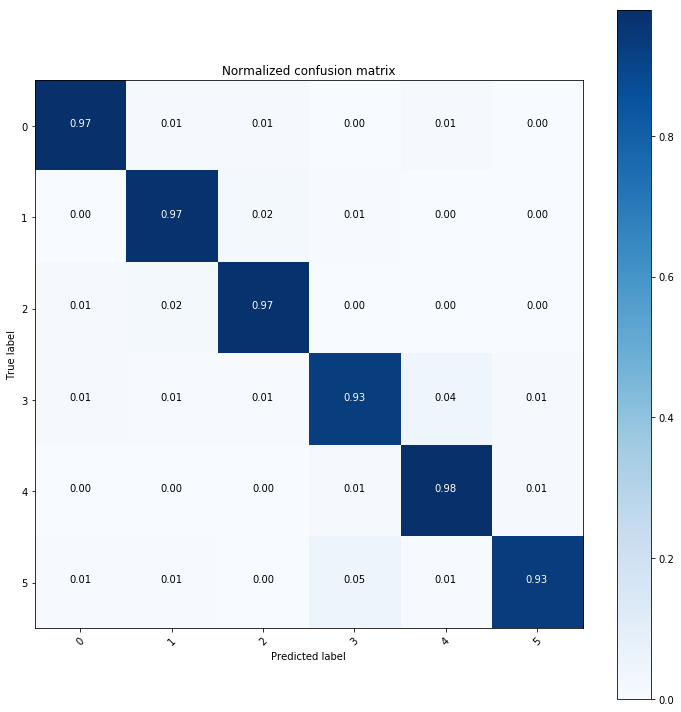

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       113
          1       0.97      0.97      0.97       373
          2       0.97      0.97      0.97       374
          3       0.94      0.93      0.93       189
          4       0.95      0.98      0.96       189
          5       0.97      0.93      0.95       163

avg / total       0.96      0.96      0.96      1401

0.9569888727304869


In [12]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [13]:
model.save_model('lgbm_model.h5')

## who

In [14]:
train_df = pf.copy()

x = train_df.drop(['who'], axis=1)
y = train_df['who']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

2075     4
5446     9
5829    10
6219    10
839      2
3569     7
4322     8
2751     5
3331     6
6351    11
5168     9
6950    11
5684    10
5535    10
3257     6
6867    11
2388     5
2525     5
6721    11
1138     3
921      2
2826     5
3732     7
4038     7
702      2
6737    11
2749     5
2222     5
6338    11
1752     4
        ..
1784     4
959      2
4467     8
1251     3
4258     8
1831     4
1433     3
2329     5
4558     8
5451     9
5653    10
2658     5
1056     2
2912     6
6047    10
5        0
818      2
3062     6
1221     3
5414     9
3327     6
1785     4
5062     9
988      2
2599     5
116      0
962      2
2948     6
6409    11
5981    10
Name: who, Length: 2800, dtype: int64

In [15]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 12,
#     'min_data_in_leaf': 3,
    'max_depth': 6,
    'num_leaves': 2 ** 6,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.855119
[10]	valid_0's f1-score: 0.896898
[15]	valid_0's f1-score: 0.917063
[20]	valid_0's f1-score: 0.925054
[25]	valid_0's f1-score: 0.930673
[30]	valid_0's f1-score: 0.937053
[35]	valid_0's f1-score: 0.944114
[40]	valid_0's f1-score: 0.947595
[45]	valid_0's f1-score: 0.950367
[50]	valid_0's f1-score: 0.952762
[55]	valid_0's f1-score: 0.954227
[60]	valid_0's f1-score: 0.954758
[65]	valid_0's f1-score: 0.957545
[70]	valid_0's f1-score: 0.958521
[75]	valid_0's f1-score: 0.959061
[80]	valid_0's f1-score: 0.961229
[85]	valid_0's f1-score: 0.961283
[90]	valid_0's f1-score: 0.962159
[95]	valid_0's f1-score: 0.962788
[100]	valid_0's f1-score: 0.963584
[105]	valid_0's f1-score: 0.964268
[110]	valid_0's f1-score: 0.964171
[115]	valid_0's f1-score: 0.96377
[120]	valid_0's f1-score: 0.964045
[125]	valid_0's f1-score: 0.963435
[130]	valid_0's f1-score: 0.962344
[135]	valid_0's f1-score: 0.962032
[140]	valid_0

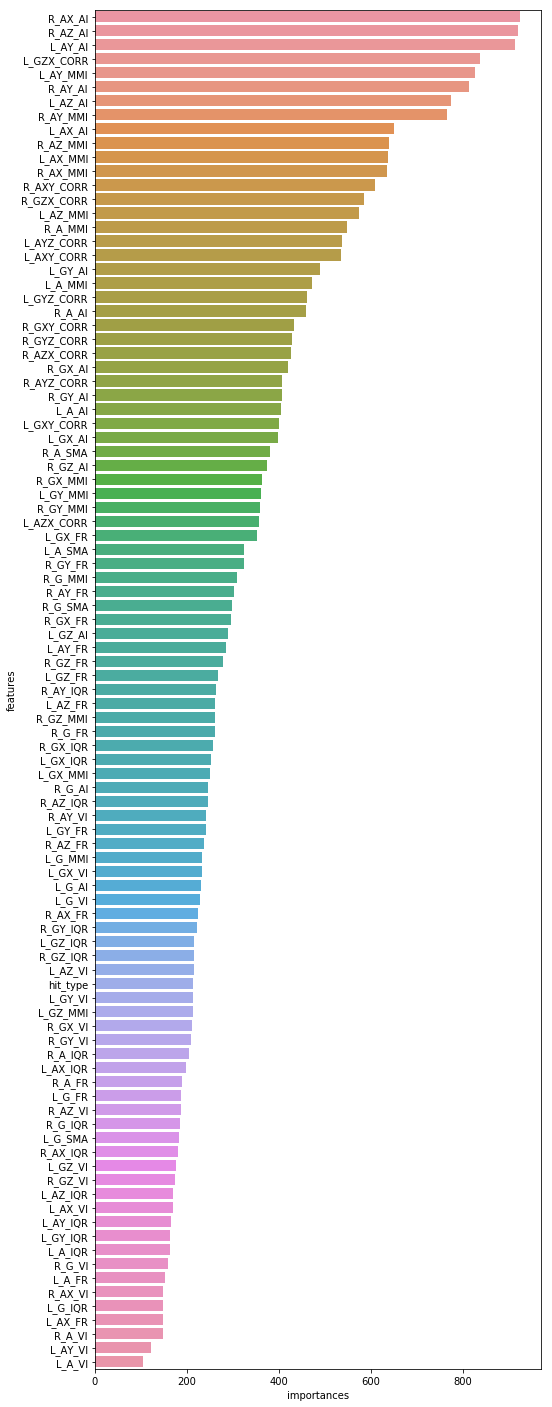

In [16]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'who'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [17]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.875      0.         0.01785714 0.01785714 0.
  0.07142857 0.         0.         0.01785714 0.         0.        ]
 [0.         0.         0.91338583 0.00787402 0.00787402 0.
  0.         0.         0.00787402 0.00787402 0.03937008 0.01574803]
 [0.         0.01369863 0.         0.8630137  0.01369863 0.02739726
  0.         0.01369863 0.02739726 0.         0.04109589 0.        ]
 [0.         0.         0.         0.00757576 0.95454545 0.00757576
  0.00757576 0.         0.00757576 0.         0.         0.01515152]
 [0.         0.         0.         0.02205882 0.         0.94852941
  0.00735294 0.         0.00735294 0.         0.         0.01470588]
 [0.         0.         0.         0.         0.         0.
  0.99130435 0.         0.         0.         0.00869565 0.        ]
 [0.         0.         0.015625   0.0078125 

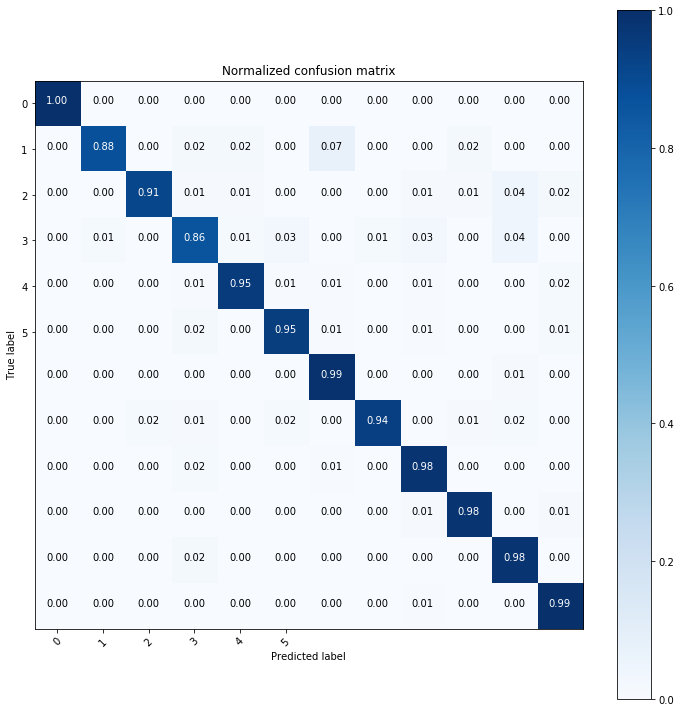

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      0.88      0.92        56
          2       0.98      0.91      0.95       127
          3       0.83      0.86      0.85        73
          4       0.98      0.95      0.97       132
          5       0.96      0.95      0.96       136
          6       0.94      0.99      0.97       115
          7       0.99      0.94      0.96       128
          8       0.97      0.98      0.97       198
          9       0.97      0.98      0.97        92
         10       0.93      0.98      0.96       158
         11       0.95      0.99      0.97       142

avg / total       0.96      0.96      0.96      1401

0.953561878504494


In [18]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [19]:
model.save_model('lgbm_model.h5')